In [2]:
import cellrank as  cr
import scanpy as sc

In [3]:
# Load h5ad file
adata = sc.read_h5ad('data/GSE217460_210322_TFAtlas_differentiated_raw.h5ad')

In [4]:
# wrangling
# Add counts layer
import scipy.sparse as sparse

# Convert 'adata.X' to a sparse matrix format if it's not already
if not sparse.issparse(adata.X):
    adata.X = sparse.csr_matrix(adata.X)

2024-02-15 16:07:23.410228: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 16:07:23.410264: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 16:07:23.411393: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 16:07:24.600477: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


KeyError: 'Could not find key your_favorite_gene in .var_names or .obs.columns.'

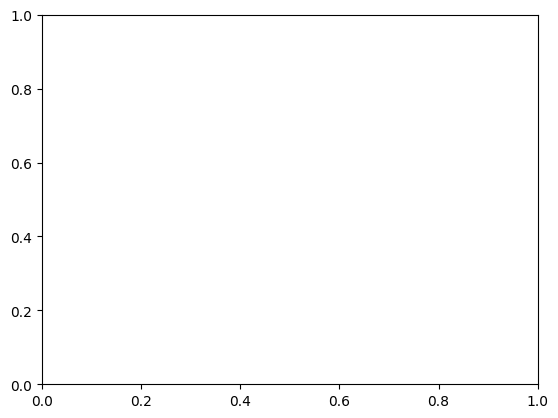

In [7]:
# reducing dimensionality 

# PCA
sc.tl.pca(adata, svd_solver='arpack')

# # harmony PCA
# sc.external.pp.harmony_integrate(adata, key='cell_type')

# Compute the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_pca')

# Compute UMAP reducedDim(sce2, "UMAP_Orig") <- reducedDim(sce, "X_umap")
sc.tl.umap(adata)

# Plot UMAP
sc.pl.umap(adata, color=['HES4'])

# DiffusionMap
adata = cr.tl.diffmap(adata)

In [ ]:
# Save the adata object locally
adata.write_h5ad('/data/tempfile.h5ad')

In [ ]:
adata = sc.read_h5ad('/data/tempfile.h5ad')